## Applying Seaborn to diamond data

First reach a perplexing result that appears to suggest that higher
quality diamonds are worth less than lower quality ones. We uncover Simpson's paradox
by taking more finely grained glimpses into the data that suggest the opposite is actually
true.

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [76]:
path = 'D:\\ml_code\\data_science\\pandas\\Pandas_Code\\data\\'
diamonds_path = path + 'diamonds.csv'
diamonds = pd.read_csv(diamonds_path)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Kaggle Dataset info

https://www.kaggle.com/shivam2503/diamonds
- price price in US dollars (\$326--\$18,823)
- carat weight of the diamond (0.2--5.01)
- cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color diamond colour, from J (worst) to D (best)
- clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x length in mm (0--10.74)
- y width in mm (0--58.9)
- z depth in mm (0--31.8)
- depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table width of top of diamond relative to widest point (43--95)

In [77]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### Change to categorical data

In [78]:
cut_carats = diamonds.cut.unique()[::-1]
cut_carats

array(['Fair', 'Very Good', 'Good', 'Premium', 'Ideal'], dtype=object)

In [79]:
diamonds['cut'] = pd.Categorical(diamonds['cut'],categories=cut_carats,ordered=True)

In [80]:
color_cats = diamonds['color'].sort_values().unique()[::-1]
color_cats

array(['J', 'I', 'H', 'G', 'F', 'E', 'D'], dtype=object)

In [81]:
diamonds['color'] = pd.Categorical(diamonds['color'],categories=color_cats,ordered=True)

In [82]:
clarity_cats = ['I1', 'SI2', 'SI1', 'VS2','VS1', 'VVS2', 'VVS1', 'IF']
clarity_cats

['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [83]:
diamonds['clarity'] = pd.Categorical(diamonds['clarity'],categories=clarity_cats,ordered=True)

In [84]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null category
color      53940 non-null category
clarity    53940 non-null category
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


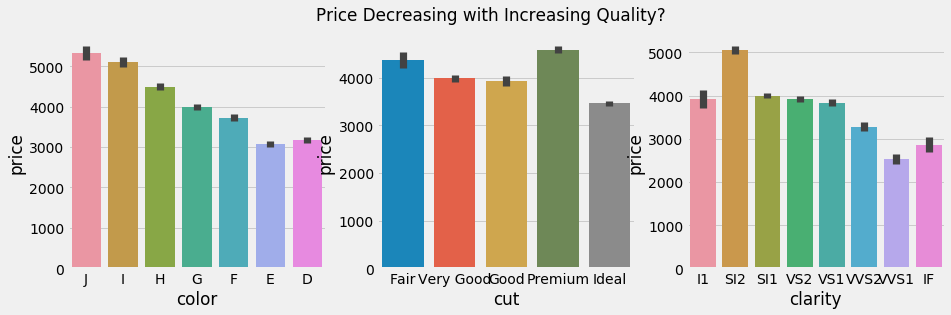

In [85]:
#mean price for each level of cut, color,clarity
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(14,4))
sns.barplot(x='color',y='price',data=diamonds,ax=ax1)
sns.barplot(x='cut', y='price', data=diamonds, ax=ax2)
sns.barplot(x='clarity', y='price', data=diamonds, ax=ax3)
fig.suptitle('Price Decreasing with Increasing Quality?');


There seems to be a decreasing trend for color and price. The highest quality cut
and clarity levels also have low prices? plot the price for each diamond color again, but make a new plot for each
level of clarity

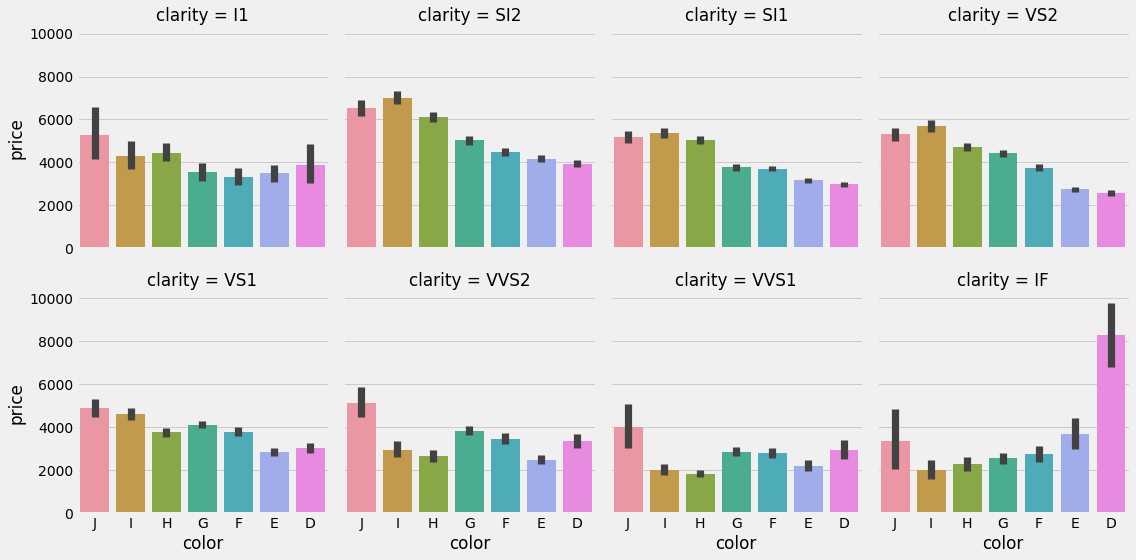

In [86]:
sns.factorplot(x='color', y='price', col='clarity',col_wrap=4, data=diamonds, kind='bar');

Price appears to decrease as color increases but not when clarity is at its highest level, bottom row, third column.  lets look relevant to size(carat)

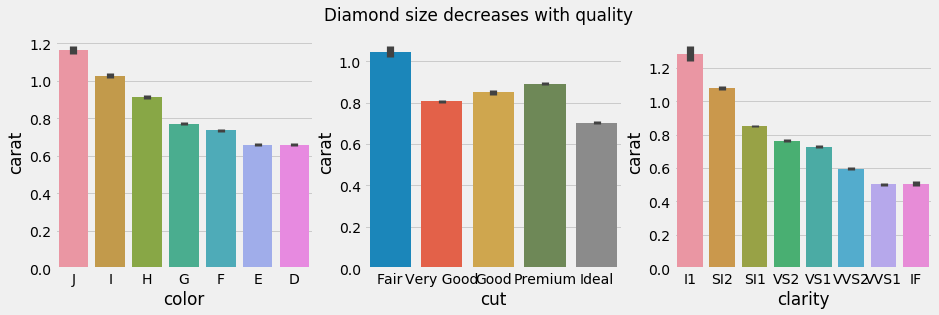

In [87]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
sns.barplot(x='color', y='carat', data=diamonds, ax=ax1)
sns.barplot(x='cut', y='carat', data=diamonds, ax=ax2)
sns.barplot(x='clarity', y='carat', data=diamonds, ax=ax3)
fig.suptitle('Diamond size decreases with quality');

Higher quality diamonds
appear to be smaller in size, which intuitively makes sense. Let's create a new
variable that segments the carat values into five distinct sections, and then
create a point plot. The plot below reveals that higher quality
diamonds do, in fact, cost more money when they are segmented based on size

In [88]:
diamonds['carat_category'] = pd.qcut(diamonds.carat,5)
diamonds.carat_category.unique()

[(0.199, 0.35], (0.35, 0.53], (0.53, 0.9], (0.9, 1.13], (1.13, 5.01]]
Categories (5, interval[float64]): [(0.199, 0.35] < (0.35, 0.53] < (0.53, 0.9] < (0.9, 1.13] < (1.13, 5.01]]

Text(0.5,1.02,'Diamond price by size, color and clarity')

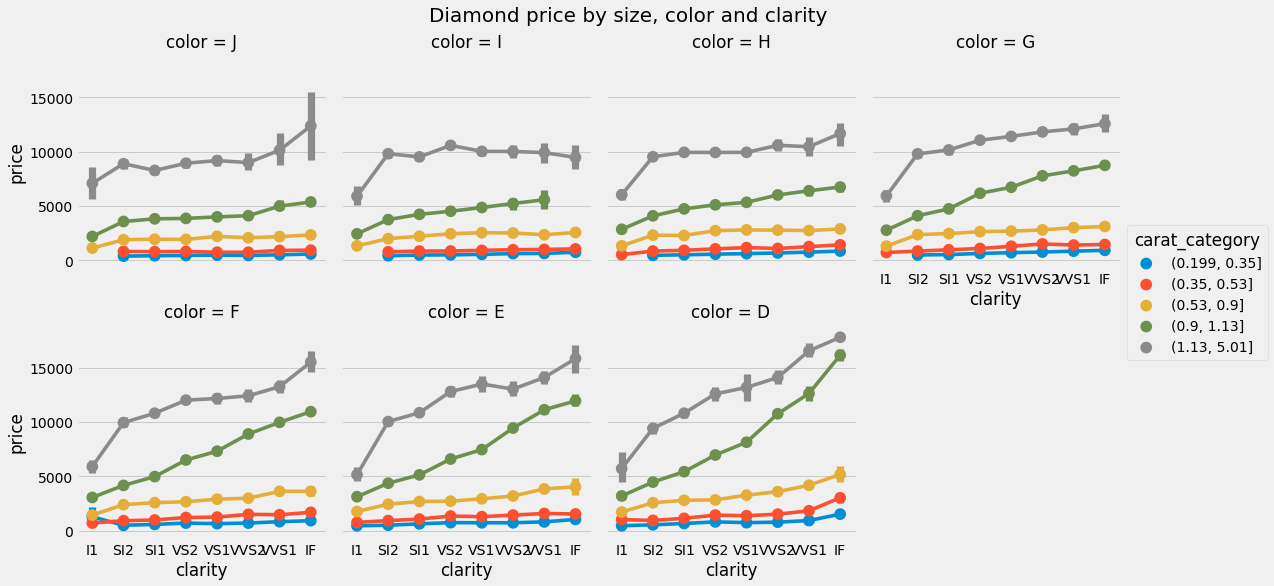

In [89]:
g = sns.factorplot(x='clarity',y='price',data=diamonds,hue='carat_category',col='color',col_wrap=4,kind='point',scale=0.5)
g.fig.suptitle('Diamond price by size, color and clarity',y=1.02, size=20)